In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model


In [64]:
df =pd.read_csv('../housing.data',delim_whitespace=True,header=None)

In [65]:
col_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.columns = col_names

In [114]:
X = df.loc[:,df.columns!='MEDV']
col_X = X.columns 
y = df['MEDV'].values

In [67]:
from sklearn.preprocessing import StandardScaler

C:\Users\Marianne\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


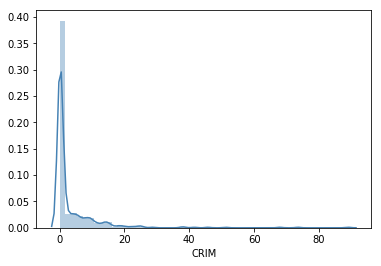

In [68]:
sns.distplot(X['CRIM'], color='steelblue');

In [94]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [115]:
print(X.head())
X_std = pd.DataFrame(X_std)
X_std.columns = col_X

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


No handles with labels found to put in legend.


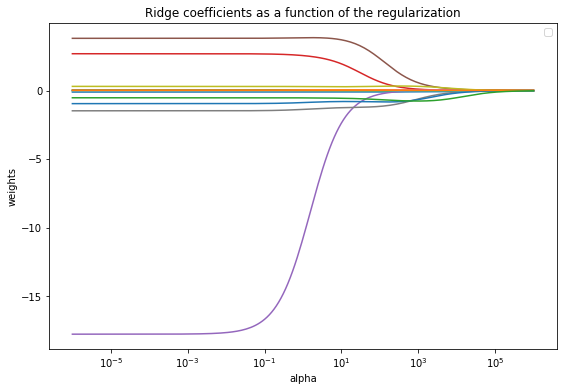

In [170]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
clf = Ridge()
coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
 

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [138]:
 clf.set_params(alpha=10)
clf.fit(X_std, y)
coefs.append(clf.coef_)

In [135]:
coefs

[array([-0.92814606,  1.08156861,  0.14089997,  0.68173973, -2.05671824,
         2.67423017,  0.01946607, -3.10404423,  2.66221757, -2.07678162,
        -2.06060665,  0.84926842, -3.74362711]),
 array([-0.92814605,  1.08156861,  0.14089997,  0.68173973, -2.05671823,
         2.67423018,  0.01946606, -3.10404423,  2.66221756, -2.07678161,
        -2.06060665,  0.84926842, -3.74362711]),
 array([-0.92814605,  1.08156861,  0.14089996,  0.68173973, -2.05671823,
         2.67423018,  0.01946606, -3.10404422,  2.66221755, -2.07678159,
        -2.06060665,  0.84926842, -3.74362711]),
 array([-0.92814605,  1.0815686 ,  0.14089996,  0.68173973, -2.05671822,
         2.67423018,  0.01946606, -3.10404422,  2.66221753, -2.07678158,
        -2.06060665,  0.84926842, -3.74362711]),
 array([-0.92814605,  1.0815686 ,  0.14089995,  0.68173973, -2.05671822,
         2.67423018,  0.01946606, -3.10404421,  2.66221752, -2.07678156,
        -2.06060664,  0.84926842, -3.7436271 ]),
 array([-0.92814605,  1.0

In [167]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 5, 7]).fit(X_std, y)
clf.score(X_std, y) 


0.7403844912518913

In [168]:
clf.alpha_

5.0

In [165]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 6]).fit(X, y)
clf.score(X, y) 


0.7406421899248019

In [166]:
clf.alpha_

0.01